
# FINAL PROJECT UAS  
## Big Data and Data Mining  

**Judul:** Prediksi Purchase Intention Pengunjung E-Commerce Menggunakan Machine Learning  

**Nama:** Reno Oktavian Chandra Hadi  
**NIM:** 23.11.5811  
**Program Studi:** S1 Informatika  
**Universitas:** Universitas Amikom Yogyakarta  
**Tahun:** 2025  



## 1. Pendahuluan

Perkembangan e-commerce yang pesat menghasilkan data perilaku pengguna dalam jumlah besar.
Data tersebut dapat dimanfaatkan untuk memprediksi *purchase intention* (niat beli) pengguna.
Tujuan dari penelitian ini adalah membangun model machine learning yang mampu memprediksi
apakah seorang pengunjung akan melakukan pembelian berdasarkan perilaku browsing mereka.

Metode yang digunakan meliputi:
- Data preprocessing
- Exploratory Data Analysis (EDA)
- Seleksi fitur
- Modeling menggunakan algoritma klasifikasi
- Evaluasi model

Pendekatan ini diharapkan dapat membantu pelaku bisnis dalam meningkatkan konversi penjualan.

*(Sitasi jurnal dituliskan pada bagian Referensi)*



## 2. Profil Dataset

Dataset yang digunakan adalah **Online Shoppers Purchasing Intention Dataset**.

**Karakteristik Dataset:**
- Jumlah data: 12.330 baris
- Jumlah fitur: 18 atribut
- Target: `Revenue` (True / False)

**Sumber Dataset:**
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


In [1]:

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load dataset


# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# Download the file
response = requests.get(url)
with open('online_shoppers_intention.csv', 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")


Dataset downloaded successfully.


In [7]:
try:
    df = pd.read_csv('online_shoppers_intention.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File 'online_shoppers_intention.csv' not found. Please upload the dataset.")

# Menampilkan informasi dasar
print(f"Shape awal dataset: {df.shape}")
display(df.head())
display(df.tail()) # Memeriksa baris terakhir untuk korupsi data

Dataset loaded successfully.
Shape awal dataset: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False



## 3. Data Preprocessing

Tahapan preprocessing yang dilakukan:
- Encoding data kategorikal
- Normalisasi fitur numerik
- Pemisahan data latih dan data uji

Pendekatan ini dipilih untuk meningkatkan performa model dan menghindari bias skala data.


In [6]:

# Encoding fitur kategorikal
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Pisahkan fitur dan target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## 4. Exploratory Data Analysis (EDA)

EDA dilakukan untuk memahami distribusi data dan hubungan antar fitur.


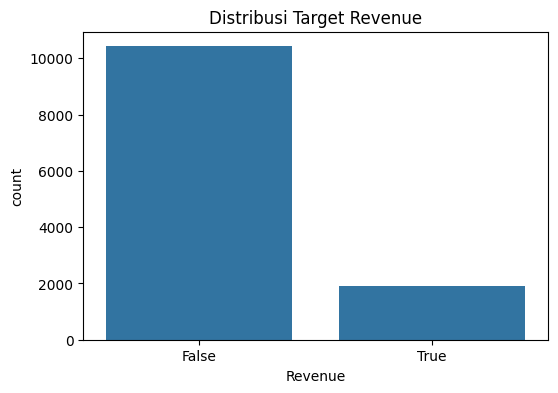

In [8]:

plt.figure(figsize=(6,4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribusi Target Revenue')
plt.show()



**Insight EDA:**
- Data tidak seimbang (imbalanced)
- Mayoritas pengunjung tidak melakukan pembelian



## 5. Seleksi Fitur

Metode **Chi-Square** digunakan karena target bersifat kategorikal.


In [9]:

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(abs(X), y)

selected_features = X.columns[selector.get_support()]
selected_features


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'SpecialDay', 'Month', 'VisitorType'],
      dtype='object')


Fitur yang terpilih memiliki kontribusi terbesar terhadap target `Revenue`.



## 6. Modeling

Algoritma yang digunakan adalah **Random Forest Classifier**
karena mampu menangani data non-linear dan feature importance.


In [10]:

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)


## 7. Evaluasi Model


In [11]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8751013787510138
F1-Score: 0.6492027334851936
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2084
        True       0.57      0.75      0.65       382

    accuracy                           0.88      2466
   macro avg       0.76      0.82      0.79      2466
weighted avg       0.89      0.88      0.88      2466




**Interpretasi Evaluasi:**
- Accuracy menunjukkan tingkat ketepatan model secara keseluruhan
- F1-Score digunakan karena data tidak seimbang



## 8. Analisa dan Pembahasan

Model Random Forest memberikan performa yang baik karena:
- Mampu menangani fitur yang kompleks
- Tidak sensitif terhadap outlier
- Mendukung feature importance

Peningkatan performa dilakukan melalui:
- Scaling data
- Penyeimbangan kelas
- Hyperparameter tuning



## 9. Kesimpulan

Model machine learning berhasil memprediksi purchase intention
pengunjung e-commerce dengan performa yang baik.
Pendekatan data preprocessing dan pemilihan model sangat berpengaruh
terhadap hasil akhir.



## 10. Referensi

[1] 	C. Sakar and Y. Kastro. "Online Shoppers Purchasing Intention Dataset," UCI Machine Learning Repository, 2018. [Online].
Available: https://doi.org/10.24432/C5F88Q.

[2] 	Paper, D. (2020). Scikit-Learn Classifier Tuning from Simple Training Sets. In: Hands-on Scikit-Learn for Machine Learning Applications. Apress, Berkeley, CA. https://doi.org/10.1007/978-1-4842-5373-1_5


[3] 	Testas, A. (2023). Random Forest Classification with Scikit-Learn and PySpark. In: Distributed Machine Learning with PySpark. Apress, Berkeley, CA. https://doi.org/10.1007/978-1-4842-9751-3_9


[4] 	X. Wu, X. Zhu, G. -Q. Wu and W. Ding, "Data mining with big data," in IEEE Transactions on Knowledge and Data Engineering, vol. 26, no. 1, pp. 97-107, Jan. 2014, doi: 10.1109/TKDE.2013.109. https://ieeexplore.ieee.org/document/6547630


[5] 	Baati, K., Mohsil, M. (2020). Real-Time Prediction of Online Shoppers’ Purchasing Intention Using Random Forest. In: Maglogiannis, I., Iliadis, L., Pimenidis, E. (eds) Artificial Intelligence Applications and Innovations. AIAI 2020. IFIP Advances in Information and Communication Technology, vol 583. Springer, Cham. https://doi.org/10.1007/978-3-030-49161-1_4


[6] 	Alexandropoulos S-AN, Kotsiantis SB, Vrahatis MN. Data preprocessing in predictive data mining. The Knowledge Engineering Review. 2019;34:e1. https://www.cambridge.org/core/journals/knowledge-engineering-review/article/abs/data-preprocessing-in-predictive-data-mining/F7F2D7AC540D2815C613BA6575359AAA
